### Projeto de Insight - House Rocket

#### Questão de Negócio

 1.) Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

 2.) Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço ?

#### Entendimento de Negócio

1. Produto Final

    - Um arquivo .csv com a recomendação de quais imóveis a serem comprados.
    - Um arquiv0 .csv com as sugestões de venda de um apartamento por um valor recomendado.
    

2. Ferramentas

    - Python 3.9
    - PyCharm(Construção Streamlit)
    - JupyterNotebook(Análise de Dados)
    
    
3. Processo

   1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?
   
       PLANO:
           - Coletar os dados
           - Limpá-los e organizá-los;
           - Agrupar os imóveis por ZIPCODE;
           - Em cada região, encontar a mediana dos preços;
           - Sugerir como compra os imóveis de cada região que estão abaixo do preço mediano e estejam em boas condições.
           

   2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?
   
       PLANO:
           - Agrupar os imóveis por ZIPCODE e por sazonalidade;
           - Dentro de cada região e sazonalidade, calcular a mediana do preco.
           - Condiçõesde venda:
                1. Se o preço da compra for maior que a mediana da região + sazonalidade -> O preço da venda será igual ao preço da compra + 10%;
                2. 1. Se o preço da compra for menor que a mediana da região + sazonalidade -> O preço da venda será igual ao preço da compra + 30%;
                
    
#### Coleta e Limpeza dos Dados

    - Coletar os dados do site do Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction)
    - Limpeza de Dados:
        - Remover datas erradas.
        - Remover outliers devido à erro do sistema
        
        
#### Hipóteses de Negócio

    - Hipótese 1: Imóveis que possuem vista para água, são 30% mais caros, na média.
    - Hipótese 2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média. 
    - Hipótese 3: Imóveis com porão são 50% mais caros na média.
    - Hipótese 4: Imóveis com mais de 2 pisos são em média, 40 % mais caros.
    - Hipótese 5: Imóveis com condições abaixo de 3 são, na média, 40% mais baratos.
    

### Início do Código

In [1]:
# Libraries

import pandas as pd
import numpy as np


pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Extraction

# Essa função realização a extração dos dados da máquina
def base_de_dados(file):
    
    return pd.read_csv(file)
    
    
# Transformations


# Essa função limpa e organiza os dados que nós precisamos para trabalhar
def limpeza_organizacao_dados(dataset):
    
    # transformação das datas para datetime
    dataset['date'] = pd.to_datetime(dataset['date'])
    
    # Criação da coluna month e vamos preencher somente com os mês e o dia das datas.
    
    data['month'] = pd.to_datetime(data['date']).dt.strftime('%m-%d')
    
    # transformação das informações da coluna waterfront
    dataset['waterfront'] = dataset['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')
    
    # criação da coluna sanzonality
    dataset['seasons'] = data['month'].apply(lambda x:'summer' if '06-21' <= x < '09-23' else
                                                          'autumn' if '09-23' <= x < '12-21' else
                                                          'spring' if '03-20' <= x < '06-21' else 'winter')    
    
    # criaçã da coluna onde será informado se a casa será comprada ou  não
    data['option_buy'] = 'no_buy'
    
    # criacao da coluna em que será adicionado a mediana do preços de cada região
    data['median_price_zipcode'] = ''
    return dataset


# Essa funcao vai nos agrupar os dados por região, calcular a média dos preços dos imóveis dessas regiões e devolver um novo 
# conjunto
def media_precos_regiao(dataset):
    
    dataframe = dataset[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
    dataframe.columns = ['zipcode', 'median_price']
    
    for i in range(len(dataframe)):
        for j in range(len(dataset)):
            if (dataset.loc[j, 'zipcode'] == dataframe.loc[i, 'zipcode']):
                dataset.loc[j, 'median_price_zipcode'] = dataframe.loc[i,'median_price'] 
    
    
    return dataset, dataframe

# Essa função vai nos retornar na coluna option_buy para saber se devemos comprar a casa ou não baseado no preço médio das
# regiões. Além disso, a condição da casa tem que ser no mínimo 3.
def classificacao_compra(dataset):
    
    dataset['option_buy'] = dataset[['price', 'condition', 'median_price_zipcode']].apply(lambda x: 'buy' if (x['price'] < x['median_price_zipcode']) and (x['condition'] > 2) else 'no_buy', axis=1)
    
    return dataset

# Essa função vai nos retornar um dataframe com a media dos preços de cada região durante as estações, isto é, durante o
# outono, inverno, primavera e verão
def media_precos_verao(dataset):
    
    # selecionar somente os imóveis que tiveram o preço disponibilizado durante o verão
    dataset_summer = dataset[dataset['seasons'] == 'summer']
    
    # agrupar os preços por zipcode e obter a mediana dos preços durante o verão
    dataframe_summer = dataset_summer[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
    # Renomear coluna
    dataframe_summer.columns = ['zipcode', 'median_price_summer']
    
    
    return dataframe_summer
    
    #------------------------------------------------------------------------------------------------------------------
    
def media_precos_inverno(dataset):
    # selecionar somente os imóveis que tiveram os preços disponibilizados durante o inverno
    dataset_winter = dataset[dataset['seasons'] == 'winter']
    
    # agrupar os preços por zipcode e obter a mediana dos preços durante o inverno
    dataframe_winter = dataset_winter[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
    # Renomear as colunas
    dataframe_winter.columns = ['zipcode', 'median_price_winter']
    
    return dataframe_winter
    #------------------------------------------------------------------------------------------------------------------
    
    
def media_precos_outono(dataset):   
    # selecionar somente os imóveis que tiveram os preços disponibilizados durante o outono
    dataset_autumn = dataset[dataset['seasons'] == 'autumn']
                                
    # agrupar os dados por zipcode e obter a mediana dos preços durante o outono
    dataframe_autumn = dataset_autumn[['price', 'zipcode']].groupby('zipcode').median().reset_index()
                                
    # Renomear as colunas
    dataframe_autumn.columns = ['zipcode', 'median_price_autumn']
    
    return dataframe_autumn
                                
    #-------------------------------------------------------------------------------------------------------------------
    
def media_precos_primavera(dataset):
    # selecionar somente os imóveis que tiveram os preços disponibilizados durante a primavera
    dataset_spring = dataset[dataset['seasons'] == 'spring']
    
    # agrupar os preços por zipcode e obter a mediana dos preços durante a primavera
    dataframe_spring = dataset_spring[['price', 'zipcode']].groupby('zipcode').median().reset_index()
                                
    # Renomear as colunas
    dataframe_spring.columns = ['zipcode', 'median_price_spring']
                                
                                
    return dataframe_spring
    
    #----------------------------------------------------------------------------

# Essa função vai nos retornar uma dataframe com os preços de vendas por região e sazonalidade das casas compradas.
def vendas_imoveis_verao(dataset, dataframe_summer):
    
    # vamos criar uma colunas que vai receber o preço de venda das casas durante o verão
    dataset['sell_price_summer'] = 0
    
    # Estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_summer)):
        for j in range(len(dataset)):
            if (dataframe_summer.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_summer.loc[i,'median_price_summer'] < dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_summer'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_summer.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_summer.loc[i,'median_price_summer'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_summer'] = dataset.loc[j, 'price']*1.3
                
    return dataset   

def vendas_imoveis_inverno(dataset, dataframe_winter):
    
    # vamos criar uma coluna que vai receber os preços médios de venda dos imoveis durante o inverno.
    dataset['sell_price_winter'] = 0
    
    # estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_winter)):
        for j in range(len(dataset)):
            if (dataframe_winter.loc[i, 'zipcode'] == dataset.loc[j, 'zipcode']) and (dataframe_winter.loc[i, 'median_price_winter'] < dataset.loc[j, 'price']):
                dataset.loc[j, 'sell_price_winter'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_winter.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_winter.loc[i,'median_price_winter'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_winter'] = dataset.loc[j, 'price']*1.3
            
    return dataset
    
    
def vendas_imoveis_outono(dataset, dataframe_autumn):
    
    # vamos criar uma coluna que vai receber os preços médios de venda dos imoveis durante o inverno.
    dataset['sell_price_autumn'] = 0
    
    # estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_autumn)):
        for j in range(len(dataset)):
            if (dataframe_autumn.loc[i, 'zipcode'] == dataset.loc[j, 'zipcode']) and (dataframe_autumn.loc[i, 'median_price_autumn'] < dataset.loc[j, 'price']):
                dataset.loc[j, 'sell_price_autumn'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_autumn.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_autumn.loc[i,'median_price_autumn'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_autumn'] = dataset.loc[j, 'price']*1.3
            
    return dataset
    
    
def vendas_imoveis_primavera(dataset, dataframe_spring):
    
    # vamos criar uma coluna que vai receber os preços médios de venda dos imoveis durante o inverno.
    dataset['sell_price_spring'] = 0
    
    # estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_spring)):
        for j in range(len(dataset)):
            if (dataframe_spring.loc[i, 'zipcode'] == dataset.loc[j, 'zipcode']) and (dataframe_spring.loc[i, 'median_price_spring'] < dataset.loc[j, 'price']):
                dataset.loc[j, 'sell_price_winter'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_spring.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_spring.loc[i,'median_price_spring'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_spring'] = dataset.loc[j, 'price']*1.3
            
    return dataset
    
    

In [3]:
# Aqui estamos obtendo o nosso conjunto de dados para iniciar o nosso projeto
data = base_de_dados('kc_house_data.csv')

In [4]:
# Tratamento e limpeza dos dados
data = limpeza_organizacao_dados(data)

In [5]:
# Obtenção de um novo conjunto de dados onde teremos a média dos preços por região
data, conjunto_media_precos_regiao  = media_precos_regiao(data)

In [6]:
# Obtenção de um novo conjunto em que se tem a classificação das casas que podem ser compradas ou não.

tabela_classificacao_imoveis = classificacao_compra(data)



In [7]:
# Obtido a tabela das casas a serem compradas, precisamos agora, saber quando vendê-las e em que valor. Nosso critério para 
# definir o valor de venda será as estações, ou seja, vamos considerar a primavera, verão, outono, inverno.

# Obter uma tabela onde temos o preço médio de venda das casas por região durante o verão
tabela_media_precos_regiao_verao = media_precos_verao(data)

# Obter uma tabela com o preço médio de venda das casas por região durante o inverno
tabela_media_precos_regiao_inverno = media_precos_inverno(data)

# Obter uma tabela com o preço médio de venda das casas por região durante o outono
tabela_media_precos_regiao_outono = media_precos_outono(data)

# obter uma tabela com o preço médio de venda das casas por região durante o primavera
tabela_media_precos_regiao_primavera = media_precos_primavera(data)


In [8]:
# Aqui nos vamos selecionar somente as casas a serem compradas com as determinadas condições consideradas
tabela_classificacao_imoveis_venda = tabela_classificacao_imoveis[tabela_classificacao_imoveis['option_buy']=='buy'].copy().reset_index()

# Vamos estabelecer os preços de venda dos imoveis durante o verão
tabela_classificacao_imoveis_venda = vendas_imoveis_verao(tabela_classificacao_imoveis_venda, tabela_media_precos_regiao_verao)

# Vamos estabelecer os preços de venda dos imóveis durante o inverno
tabela_classificacao_imoveis_venda = vendas_imoveis_inverno(tabela_classificacao_imoveis_venda, tabela_media_precos_regiao_inverno)

# Vamos estabelecer os preços de venda dos imóveis durante o outono
tabela_classificacao_imoveis_venda = vendas_imoveis_outono(tabela_classificacao_imoveis_venda, tabela_media_precos_regiao_outono)

# Vamos estabelecer os preços de venda dos imóveis durante o primavera
tabela_classificacao_imoveis_venda = vendas_imoveis_primavera(tabela_classificacao_imoveis_venda, tabela_media_precos_regiao_primavera)


In [9]:
# Aqui vamos eliminar as colunas desnecessárias e gerar o arquivo csv para o time de negócio com os preços de vendas dos imóveis
# de acordo com a estação do ano.

tabela_classificacao_imoveis_venda.to_csv("imoveis_preco_venda_estacao.csv")

In [10]:
# Aqui vamos eliminar as colunas desnecessárias e gerar o arquivo csv para o time de negócio com as casas que devem ser compradas
# levando em consideração a região em que estão localizadas.

tabela_classificacao_imoveis_compra = tabela_classificacao_imoveis[tabela_classificacao_imoveis['option_buy']=='buy'].copy().reset_index()

tabela_classificacao_imoveis_compra.to_csv("imoveis_compra.csv")

### Respondendo as Hipóteses de negócio

##### Afirmação 1: Imóveis que possuem vista para água, são 30% mais caros, na média.

Essa afirmação é falsa. No gráfico abaixo podemos ver que, na verdade, imoveis com vista para agua, são mais de 50% mais caros na média 


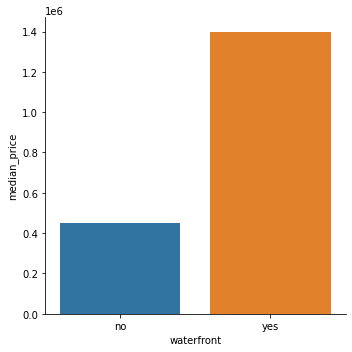

In [11]:
print('Essa afirmação é falsa. No gráfico abaixo podemos ver que, na verdade, imoveis com vista para agua, são mais de 50% mais caros na média ')

import seaborn as sns
# Estratégia de Resolução:

dataframe_analysis_hip1 = data[['price', 'waterfront']].groupby('waterfront').median().reset_index()
dataframe_analysis_hip1.columns = ['waterfront', 'median_price']


grafico_hipotese1 = sns.catplot(x='waterfront', y='median_price', kind='bar', data= dataframe_analysis_hip1)

##### Afirmação 2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média. 

Em geral essa afirmação é falsa. O gráfico abaixo nos permite analisar essa situação por cada região. 98136 e 98027 


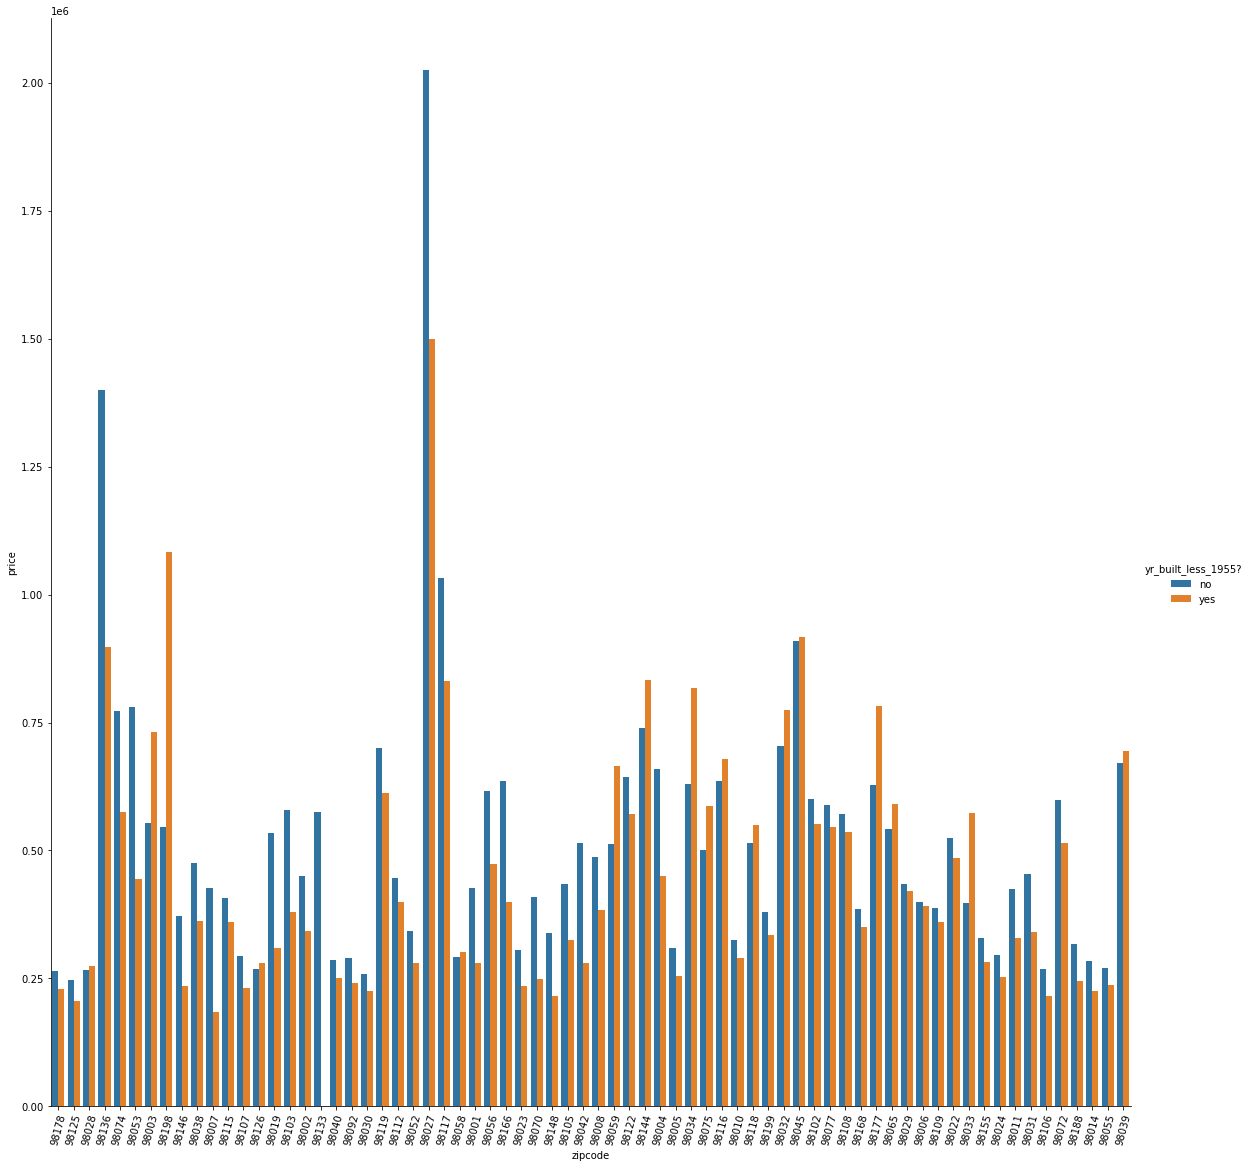

In [12]:
print('Em geral essa afirmação é falsa. O gráfico abaixo nos permite analisar essa situação por cada região. 98136 e 98027 ')

# Estratégia de Resolução

# 1.) Construir uma coluna onde será estabelecido se o imóvel é mais antigo que 1955 ou não.
# 2.) Vamos agrupar os os preços a partir dessa coluna e, em seguida, calcular a mediana.
# 3.) Obter um novo dataframe com essas informações e construir um gráfico para visualizar.

dataframe_analise_hipotese_2 = data.copy()
dataframe_analise_hipotese_2['yr_built_less_1955?'] = dataframe_analise_hipotese_2['yr_built'].apply(lambda x: 'yes' if x < 1955 else 'no')

dataframe_graphics_hipotese_2 = dataframe_analise_hipotese_2[[ 'price', 'zipcode', 'yr_built_less_1955?' ]].groupby(['zipcode', 'yr_built_less_1955?']).median().reset_index()


graphics_hipotese_2 = sns.catplot(data=dataframe_graphics_hipotese_2, 
                                  x='zipcode', 
                                  y='price', 
                                  hue='yr_built_less_1955?', 
                                  kind='bar', 
                                  height=16)

graphics_hipotese_2.set_xticklabels(labels=dataframe_analise_hipotese_2['zipcode'].unique().tolist(), rotation=75)

##### Afirmação 3: Imóveis com porão são 50% mais caros na média.

Essa afirmação é falsa. Podemos no ver no gráfico abaixo que em quase todas as regiões os imóveis com porão são mais
caros. Entretanto, não chega a ser 50%. Todavia, existem regiões em que temos o contrário, nas regiõs 98105 e 98001
as casas sem porão são mais caras.


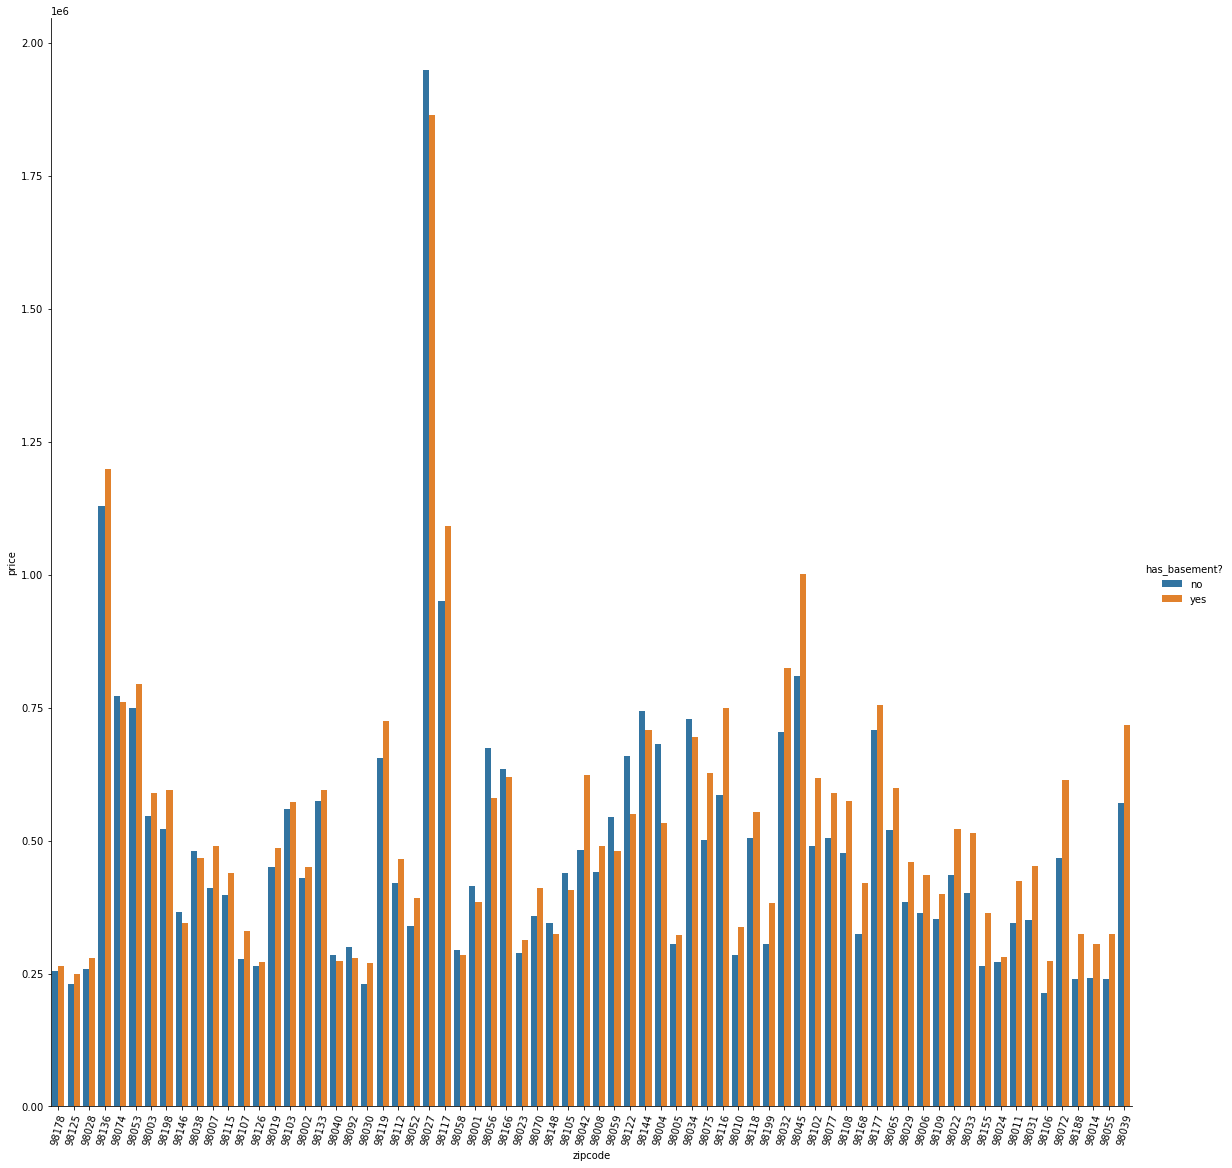

In [13]:
print('Essa afirmação é falsa. Podemos no ver no gráfico abaixo que em quase todas as regiões os imóveis com porão são mais')
print('caros. Entretanto, não chega a ser 50%. Todavia, existem regiões em que temos o contrário, nas regiõs 98105 e 98001')
print('as casas sem porão são mais caras.')

# Estratégia de Resolução

# 1.) Classificar os imóveis que possuem porão ou não
# 2.) Agrupar os preços por zipcode e imoveis que tem porão ou não.
# 3.) Calcular a mediana e plotar um gráfico.

# obtendo um novo gráfico
dataframe_analise_hipotese_3 = data.copy()

# Agrupamento
dataframe_analise_hipotese_3['has_basement?'] = data['sqft_basement'].apply(lambda x: 'yes' if x > 0 else 'no')

# Obtendo os dados para a construção do gráfico
dataframe_graphics_hipotese_3 = dataframe_analise_hipotese_3[['price', 'zipcode', 'has_basement?']].groupby(['zipcode', 'has_basement?']).median().reset_index()

# renomeando as colunas


# plotando o gráfico

graphics_hipotese_3 = sns.catplot(data=dataframe_graphics_hipotese_3, 
                                  x='zipcode', 
                                  y='price', 
                                  hue='has_basement?', 
                                  kind='bar', 
                                  height=16)

graphics_hipotese_3.set_xticklabels(labels=dataframe_analise_hipotese_3['zipcode'].unique().tolist(), rotation=75)

##### Afirmação 4: Imóveis com mais de 2 pisos são em média, 40 % mais caros.

Essa afirmação é válida para quase todas as regiões como podemos ver no gráfico abaixo. Existem regiões como a 98024 em que essas são até 70% mais caros na média. Assim, o insight que conseguimos
passar para a equipe de negócio é que casas com mais de 2 pisos são uma ótima opção a serem adquiridas e revendidas.


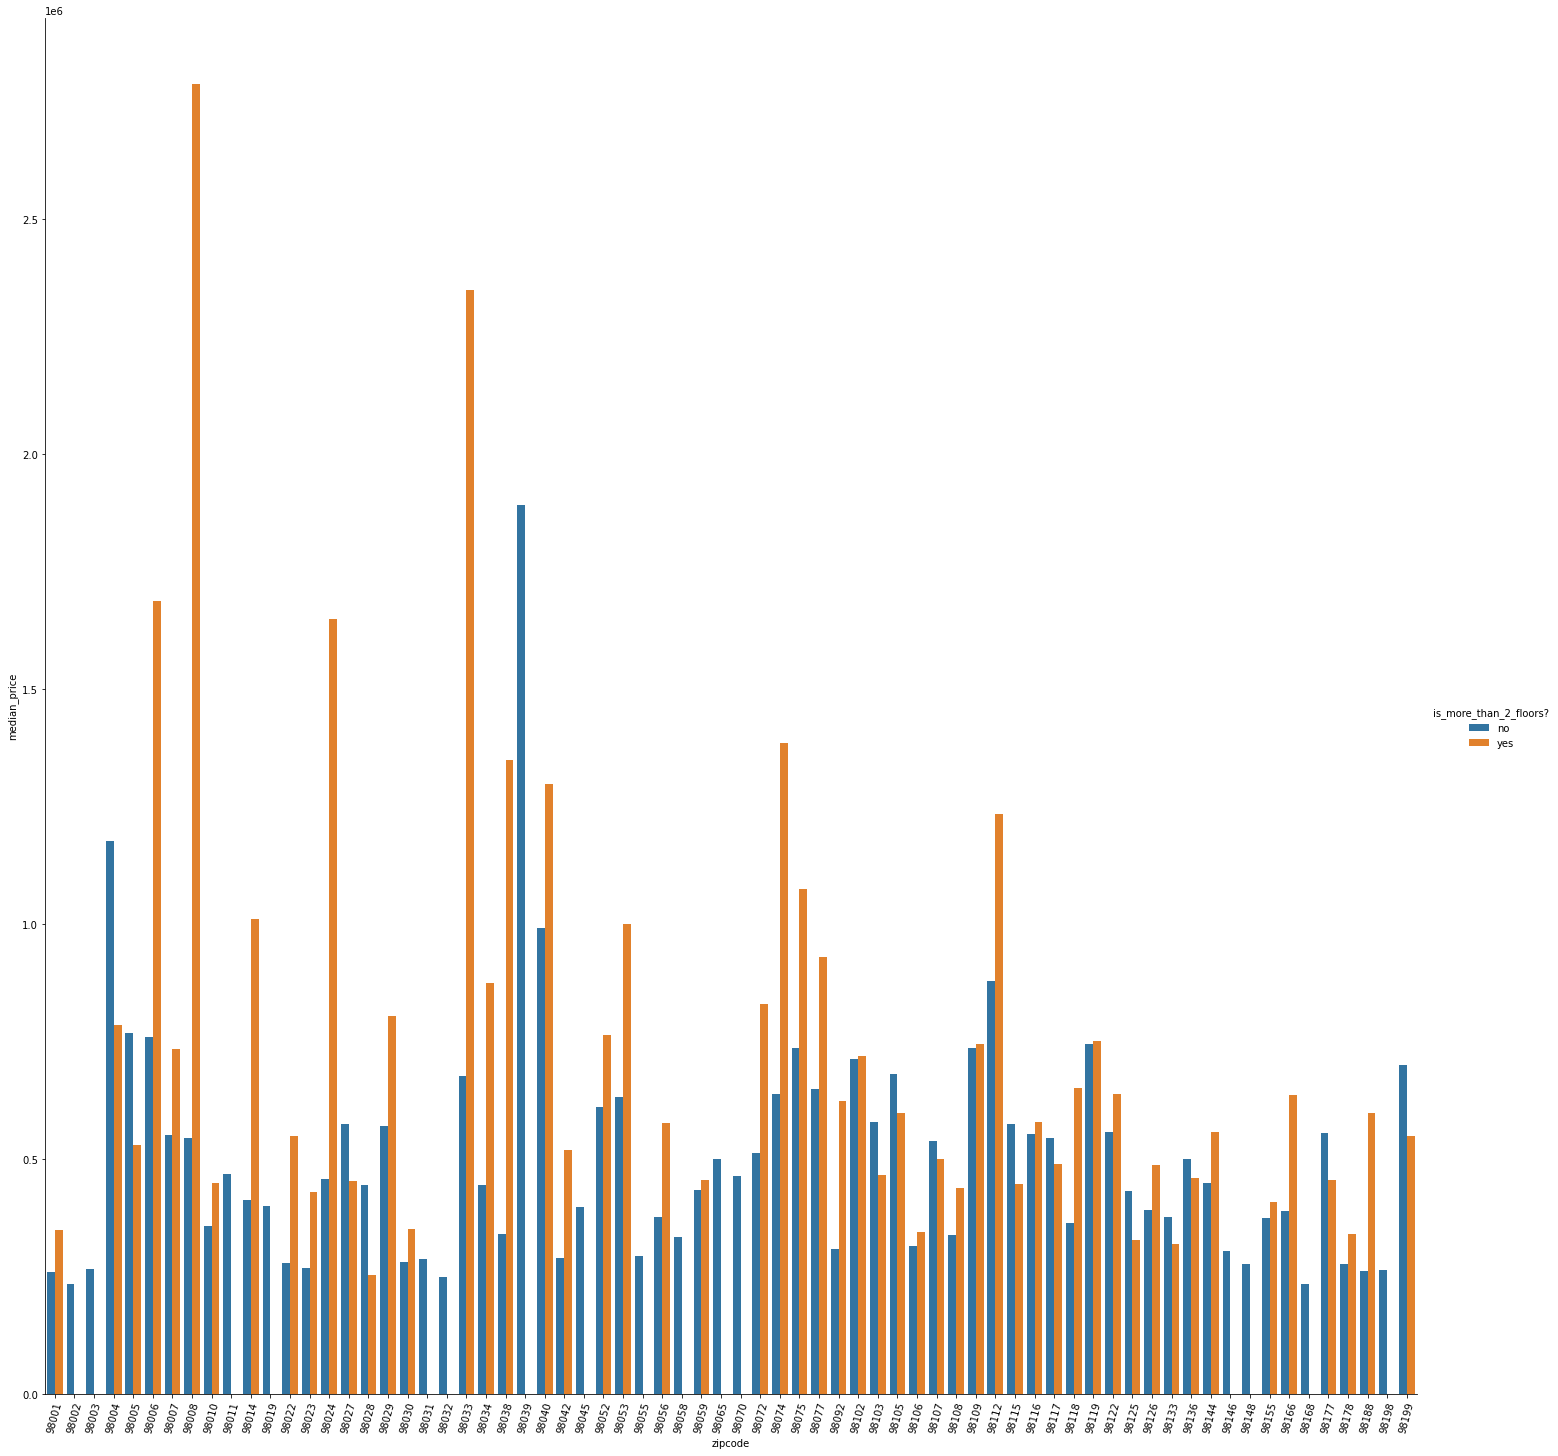

In [14]:
print('Essa afirmação é válida para quase todas as regiões como podemos ver no gráfico abaixo. Existem regiões como a 98024 em que essas são até 70% mais caros na média. Assim, o insight que conseguimos')
print('passar para a equipe de negócio é que casas com mais de 2 pisos são uma ótima opção a serem adquiridas e revendidas.')


# Estratégia de Resolução.

# 1.) Criar uma coluna em que será estabelecido se o imóvel possui mais de 2 pisos ou não.
# 2.) Agrupar os preços por zipcode e por quantidade de pisos.
# 3.) Obter a mediana dos preços.
# 4.) Obter um novo dataframe para a plotagem gráfico.

dataframe_analise_hipotese_4 = data.copy()

dataframe_analise_hipotese_4['is_more_than_2_floors?']=data['floors'].apply(lambda x: 'yes' if x > 2 else 'no')

dataframe_graphics_hipotese_4 = dataframe_analise_hipotese_4[['price', 
                                                              'zipcode', 
                                                              'is_more_than_2_floors?']].groupby(['zipcode', 'is_more_than_2_floors?']).median().reset_index()

dataframe_graphics_hipotese_4.columns = ['zipcode', 'is_more_than_2_floors?', 'median_price']

graphics_hipotese_4 = sns.catplot(data=dataframe_graphics_hipotese_4, 
                                  x='zipcode', 
                                  y='median_price', 
                                  hue='is_more_than_2_floors?', 
                                  kind='bar', 
                                  height=20)


graphics_hipotese_4.set_xticklabels(labels=dataframe_graphics_hipotese_4['zipcode'].unique().tolist(), rotation=75)


##### Afirmação 5:  Imóveis com condições abaixo de 3 são, na média, 40% mais baratos.

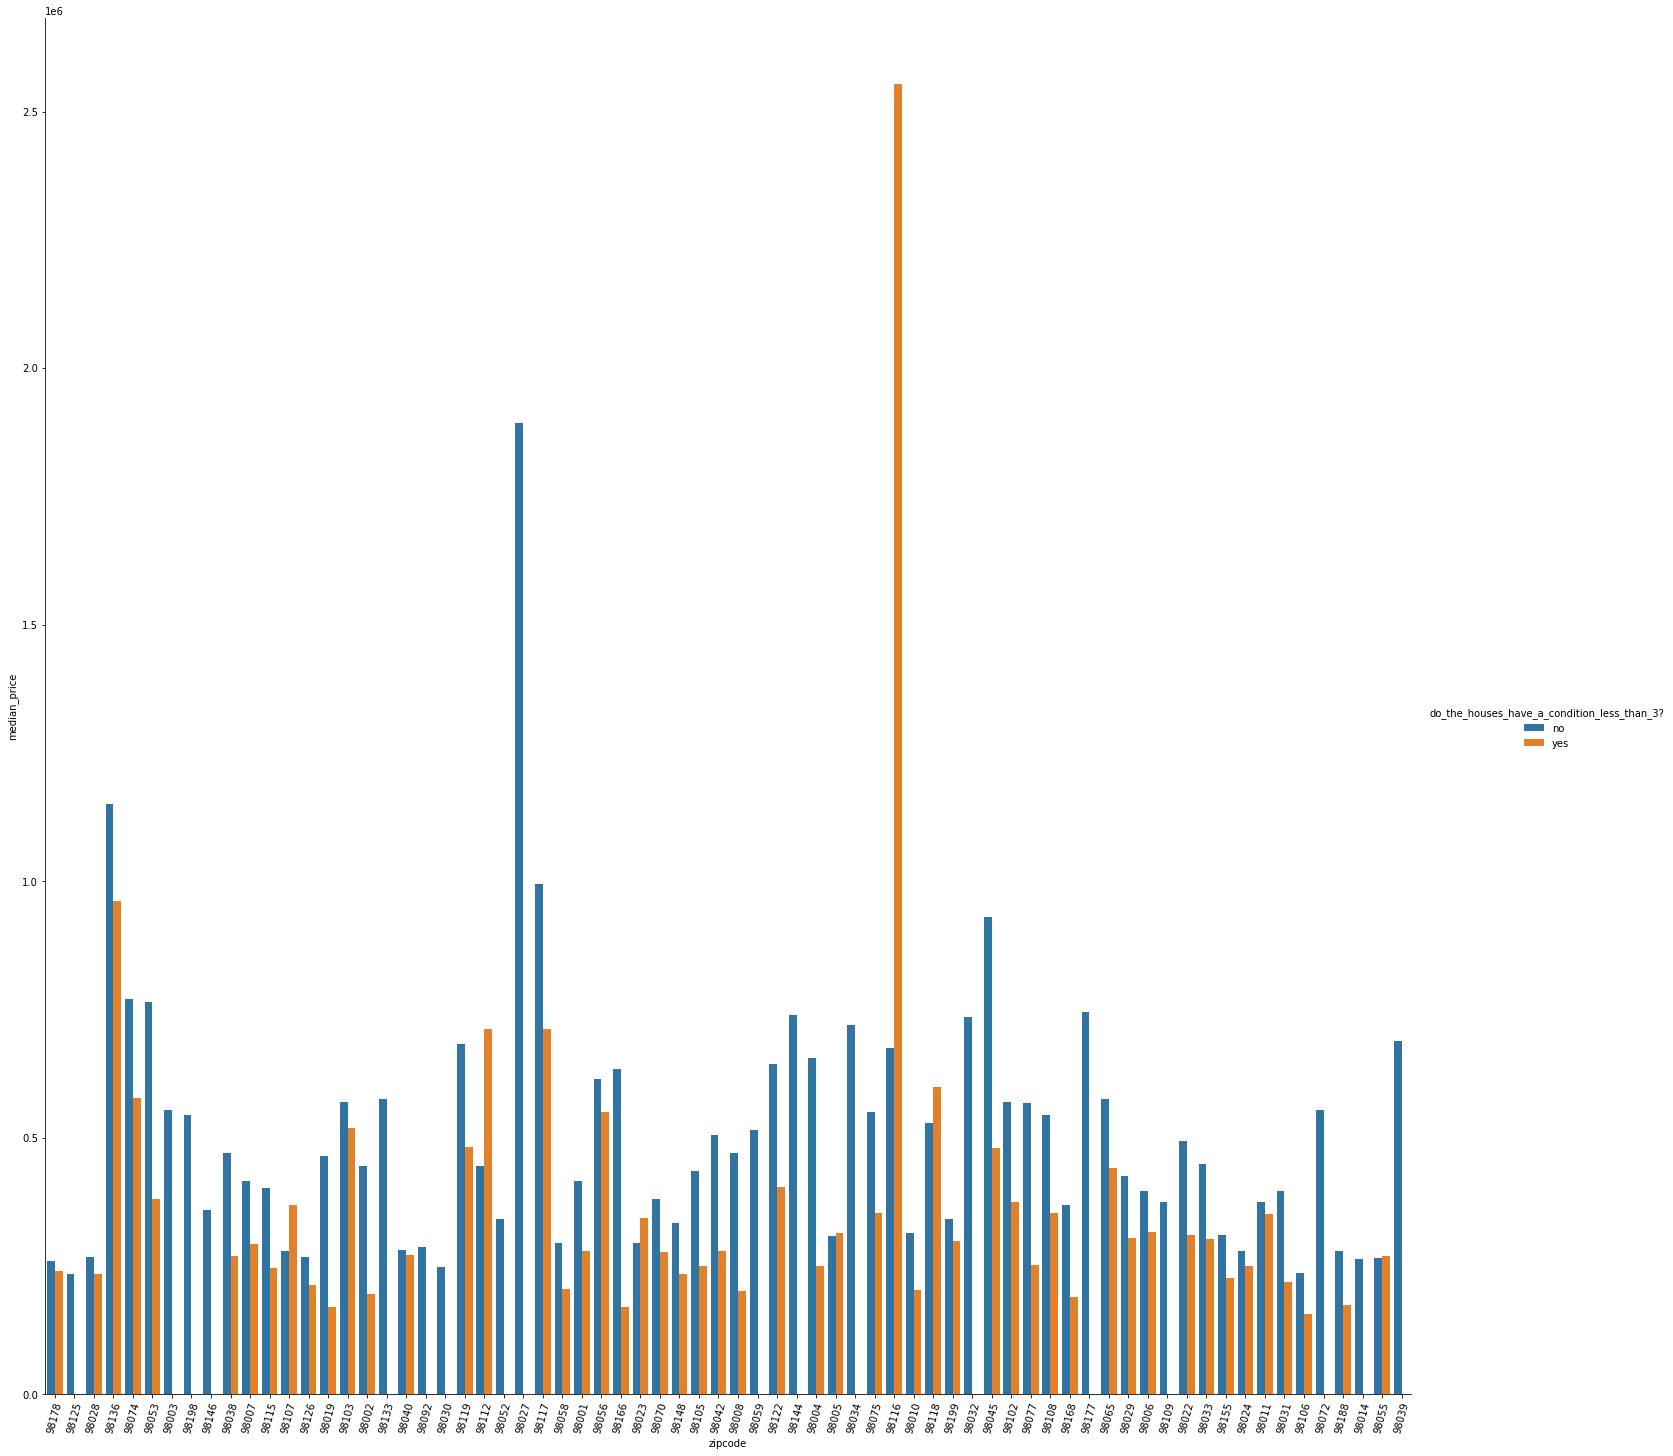

In [23]:
dataframe_analise_hipotese_5 = data.copy()

dataframe_analise_hipotese_5['do_the_houses_have_a_condition_less_than_3?'] = dataframe_analise_hipotese_5['condition'].apply(lambda x: 'yes' if x < 3 else 'no')

dataframe_graphics_hipotese_5 = dataframe_analise_hipotese_5[['price', 'zipcode', 'do_the_houses_have_a_condition_less_than_3?']].groupby(['zipcode', 'do_the_houses_have_a_condition_less_than_3?']).median().reset_index()

dataframe_graphics_hipotese_5.columns = ['zipcode', 'do_the_houses_have_a_condition_less_than_3?', 'median_price']

graphics_hipotese_5 = sns.catplot(data=dataframe_graphics_hipotese_5, 
                                  x='zipcode', 
                                  y='median_price', 
                                  hue='do_the_houses_have_a_condition_less_than_3?', 
                                  kind='bar', 
                                  height=20)
graphics_hipotese_5.set_xticklabels(labels=dataframe_analise_hipotese_5['zipcode'].unique().tolist(), 
                                    rotation=75)